In [4]:
import csv


import pandas as pd
import matplotlib.pyplot as plt
from scipy.optimize import curve_fit
import numpy as np
import csv
from scipy.stats import norm

def channel_to_energy(channel, slope, intercept):
    # Convert channel number to energy using calibration constants
    return slope * channel + intercept

def convert_spe_to_csv(spe_file_path, slope, y_intercept):
    # Initialize lists to hold the data
    indices = []
    counts = []
    
    # Read the .Spe file content
    with open(spe_file_path, 'r') as file:
        content = file.readlines()
    
    # Flags to identify when the data section starts and when actual data starts
    data_section = False
    data_started = False
    
    for line in content:
        if line.startswith('$ROI:'):
            break  # Stop reading if we reach the $ROI: section
        if data_section and data_started:
            counts.append(int(line.strip()))  # Append count after stripping whitespace
            indices.append(len(counts))  # The index is simply the count of how many data points have been read
        if line.startswith('$DATA:'):
            data_section = True  # Set the flag to True, next lines will be data
        elif data_section and not data_started:
            data_started = True  # Skip the first line after $DATA:
    
    # Calculate the energy for each channel
    energies = [channel_to_energy(channel, slope, y_intercept) for channel in indices]
    
    # Define the CSV file path based on the .Spe file path
    csv_file_path = spe_file_path.replace('.Spe', '_with_energy.csv')
    
    # Writing the data along with the calculated energies to the CSV file
    with open(csv_file_path, 'w', newline='') as csvfile:
        writer = csv.writer(csvfile)
        writer.writerow(['Channel', 'Count', 'Energy (keV)'])  # Writing the header
        writer.writerows(zip(indices, counts, energies))  # Writing the actual data
    
    return csv_file_path

# Replace with your .Spe file path
your_spe_file_path = './02-06-2024_Na22_measurement_01.Spe'

# Calibration constants obtained previously
slope = 0.3014996053670087
y_intercept = -1109.560378847672

# Calling the function to convert .Spe to CSV
csv_file = convert_spe_to_csv(your_spe_file_path, slope, y_intercept)
print(f"CSV file created at: {csv_file}")


CSV file created at: ./02-06-2024_Na22_measurement_01_with_energy.csv


In [5]:
data = pd.read_csv("./02-06-2024_Na22_measurement_01_with_energy.csv")


0
1757


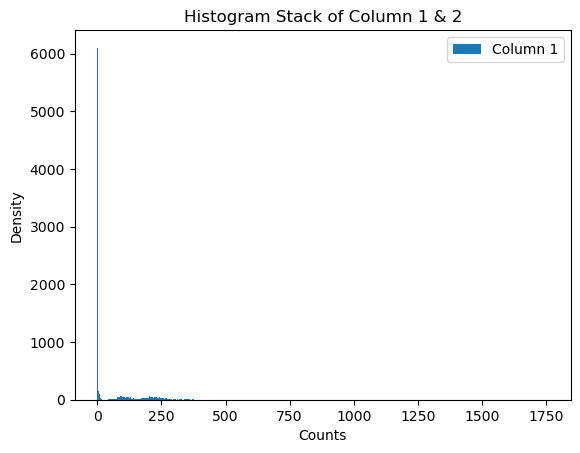

In [15]:
# plotting histograms 
MinCountRange = min(data['Count'].min(), data['Count'].min())
MaxCountRange = max(data['Count'].max(), data['Count'].max())

print(MinCountRange)
print(MaxCountRange)


plt.hist(data['Count'], label='Column 1', bins=np.arange( MinCountRange , MaxCountRange + 1, 1), align='right' ) 
  
plt.legend(loc='upper right') 
plt.xlabel('Counts') 
plt.ylabel('Density') 

plt.title('Histogram Stack of Column 1 & 2') 

# #Fit
# mu1, sigma1 = norm.fit(data['Count'])
# mu2, sigma2 = norm.fit(data['Count'])
# xmin, xmax = plt.xlim()
# x = np.linspace(xmin,xmax,100)
# p1 = norm.pdf(x,mu1,sigma1)
# p2 = norm.pdf(x,mu2,sigma2)
# plt.plot(x,p1,'k',linewidth=1)
# plt.plot(x,p2,'k',linewidth=1)
plt.show()
